In [ ]:
!pip install qutip

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from scipy import constants
import math as m
from qutip import superoperator

# Only Spins

In [106]:
# Parameters Definition
N = 3           # Number of qubits
w = np.ones(N)

######### Time evolution
tlist = np.linspace(0, 13, 1300)


In [107]:
######### Initial State
p2 = 0.2
p3 = 0.3
p4 = 0.4
p5 = 0.5

p02 = Qobj(np.array([[p2,0.96*p2],[0.96*p2,1-p2]]))
p03 = Qobj(np.array([[p3,0.96*p3],[0.96*p3,1-p3]]))
p04 = Qobj(np.array([[p4,0.96*p4],[0.96*p4,1-p4]]))
p05 = Qobj(np.array([[p5,0.96*p5],[0.96*p5,1-p5]]))


s1 = tensor([p02,p02,p02])
s2 = tensor([p02,p02,p04])
s3 = tensor([p02,p03,p04])
s4 = tensor([p03,p05,p05])

In [108]:
### System construction

sx_list, sy_list, sz_list = [], [], []
for i in range(N):
    op_list = [qeye(2)] * N
    op_list[i] = sigmax()
    sx_list.append(tensor(op_list))
    op_list[i] = sigmay()
    sy_list.append(tensor(op_list))
    op_list[i] = sigmaz()
    sz_list.append(tensor(op_list))


# Coupling strength
J = np.array([1,1,1])


# Construct the hamiltonian
H_j = H_w = 0

for n in range(N - 1):
    H_j += -0.5 * J[n] * sx_list[n] * sx_list[n + 1]
    H_j += -0.5 * J[n] * sy_list[n] * sy_list[n + 1]

for i in range(N):
    H_w += w[i] * (sz_list[i] * sz_list[i])

H = H_j + H_w

# Hamiltonian to superoperator
L0 = superoperator.liouvillian(H)

# Construct dissipation superoperator

L_diss = 0
#L_diss += lindblad_dissipator(np.sqrt(b*J_max)* sm_list[i_site]) 


########### Ensamble hole Liouvillian
L = L0  + L_diss 

## Simulation

In [109]:
### Run simulation and get results

# Solution s1
result1 = mesolve(L, s1, tlist, [],[])

# Solution s2
result2 = mesolve(L, s2, tlist, [],[])

# Soluiton s3
result3 = mesolve(L, s3, tlist, [],[])

# Soluiton s4
result4 = mesolve(L, s4, tlist, [],[])

## Dynamics

In [114]:
exp_sz_dephase = expect(sz_list, result1.states)

Text(0.5, 1.0, 'W=1.0 and J=1')

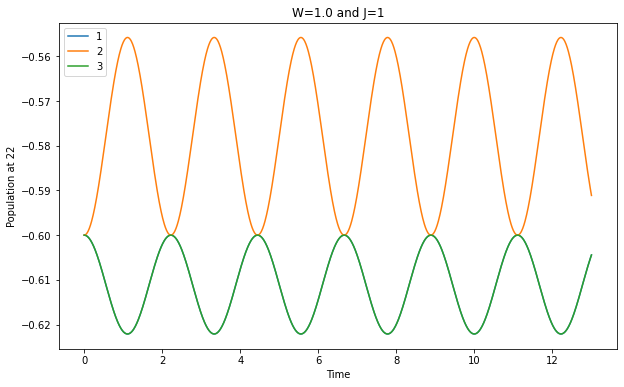

In [115]:
# Population at 22
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), exp_sz_dephase[0] , label="1")
ax.plot(list(tlist), exp_sz_dephase[1] , label="2")
ax.plot(list(tlist), exp_sz_dephase[2] , label="3")
#ax.plot(list(tlist), population_s2[:,1] , label="s2")
#ax.plot(list(tlist), population_s3[:,1] , label="s3")
#ax.plot(list(tlist), population_s4[:,1] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Expected Value')
ax.set_title(f"W={w[0]} and J={J[0]}")

## Populations

In [59]:
num_rows = len(result1.states)

population_s1 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s1[i] = result1.states[i].diag()

population_s2 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s2[i] = result2.states[i].diag()

population_s3 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s3[i] = result3.states[i].diag()

population_s4 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s4[i] = result4.states[i].diag()

Text(0.5, 1.0, 'W=1.0 and J=1')

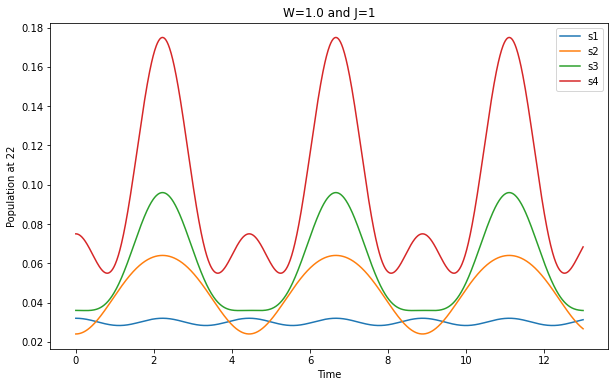

In [60]:
# Population at 22
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,1] , label="s1")
ax.plot(list(tlist), population_s2[:,1] , label="s2")
ax.plot(list(tlist), population_s3[:,1] , label="s3")
ax.plot(list(tlist), population_s4[:,1] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

Text(0.5, 1.0, 'W=1.0 and J=1')

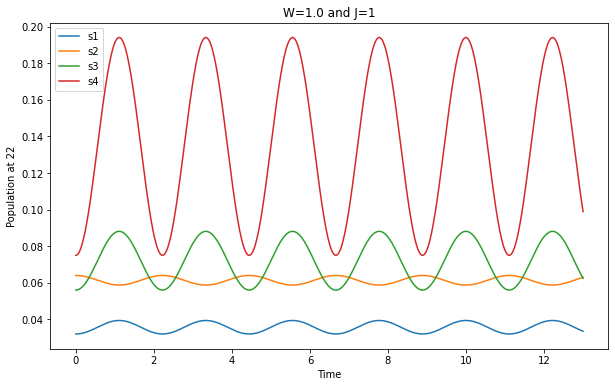

In [61]:
# Population at 33
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,2] , label="s1")
ax.plot(list(tlist), population_s2[:,2] , label="s2")
ax.plot(list(tlist), population_s3[:,2] , label="s3")
ax.plot(list(tlist), population_s4[:,2] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

Text(0.5, 1.0, 'W=1.0 and J=1')

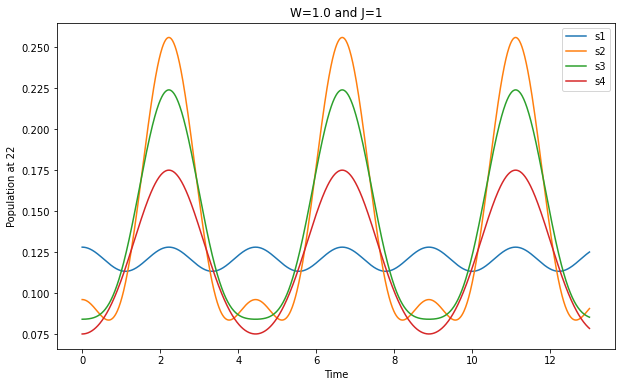

In [62]:
# Population at 44
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,3] , label="s1")
ax.plot(list(tlist), population_s2[:,3] , label="s2")
ax.plot(list(tlist), population_s3[:,3] , label="s3")
ax.plot(list(tlist), population_s4[:,3] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

Text(0.5, 1.0, 'W=1.0 and J=1')

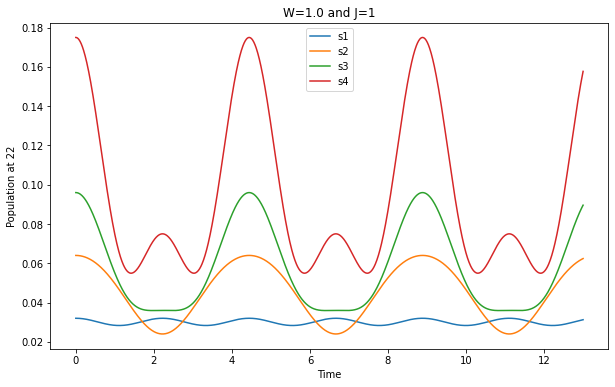

In [63]:
# Population at 44
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,4] , label="s1")
ax.plot(list(tlist), population_s2[:,4] , label="s2")
ax.plot(list(tlist), population_s3[:,4] , label="s3")
ax.plot(list(tlist), population_s4[:,4] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

Text(0.5, 1.0, 'W=1.0 and J=1')

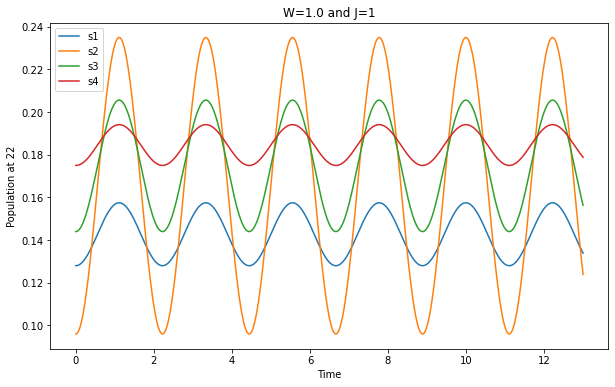

In [64]:
# Population at 44
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,5] , label="s1")
ax.plot(list(tlist), population_s2[:,5] , label="s2")
ax.plot(list(tlist), population_s3[:,5] , label="s3")
ax.plot(list(tlist), population_s4[:,5] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

## von Neumann entropy

In [10]:
from scipy.linalg import logm, expm

In [77]:
def neuman_entropy(result):

  num_rows = len(result.states)
  neuman_entropy = np.empty(num_rows)

  for i in range(num_rows):
    rho = result.states[i].full()

    rho_log = np.matmul(rho, np.log2(rho))
    neuman_entropy[i] = -np.trace(rho_log)

  return neuman_entropy

In [80]:
entropy_s1 = neuman_entropy(result1)
entropy_s2 = neuman_entropy(result2)
entropy_s3 = neuman_entropy(result3)
entropy_s4 = neuman_entropy(result4)

<ipython-input-77-6b012c695e0a>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  neuman_entropy[i] = -np.trace(rho_log)


Text(0.5, 1.0, 'Entropy')

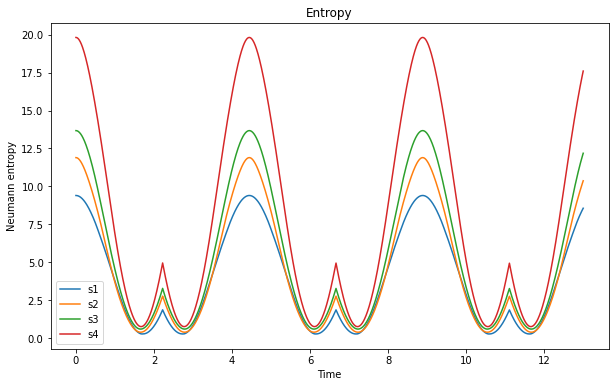

In [82]:
# Von Neuman entorpy as funtion of time
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), entropy_s1 , label="s1")
ax.plot(list(tlist), entropy_s2 , label="s2")
ax.plot(list(tlist), entropy_s3 , label="s3")
ax.plot(list(tlist), entropy_s4 , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Neumann entropy')
ax.set_title(f"Entropy")

## Concurrence betwwen 2 qbits

In [13]:
def concurrence(eigenvalues):
  lambda1 = eigenvalues.max()
  ls_eigen = list(eigenvalues)
  ls_eigen.remove(max(ls_eigen))
  diference = lambda1 - sum(ls_eigen)

  return max(-diference,0 )

In [14]:
con_12_s1 = []
for i in range(len(result1.states)):
  values =  np.sqrt(result1.states[i].ptrace([0,1]).eigenenergies())
  con_12_s1.append(concurrence(values))

con_12_s2 = []
for i in range(len(result2.states)):
  values =  np.sqrt(result2.states[i].ptrace([0,1]).eigenenergies())
  con_12_s2.append(concurrence(values))

con_12_s3 = []
for i in range(len(result3.states)):
  values =  np.sqrt(result3.states[i].ptrace([0,1]).eigenenergies())
  con_12_s3.append(concurrence(values))

con_12_s4 = []
for i in range(len(result4.states)):
  values =  np.sqrt(result4.states[i].ptrace([0,1]).eigenenergies())
  con_12_s4.append(concurrence(values))

Text(0.5, 1.0, 'W=1.0 and J=1')

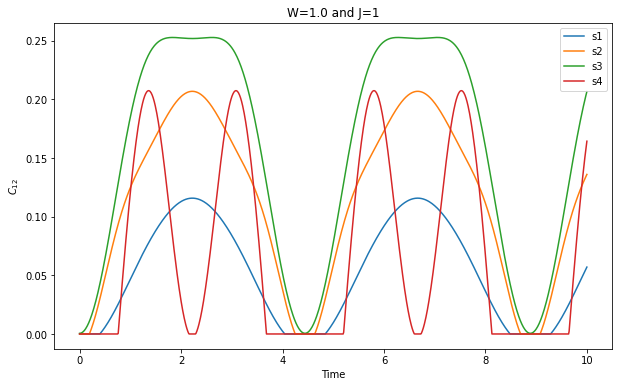

In [15]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), con_12_s1 , label="s1")
ax.plot(list(tlist), con_12_s2 , label="s2")
ax.plot(list(tlist), con_12_s3 , label="s3")
ax.plot(list(tlist), con_12_s4 , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'$C_{12}$')
ax.set_title(f"W={w[0]} and J={J[0]}")

In [16]:
con_13_s1 = []
for i in range(len(result1.states)):
  values =  np.sqrt(result1.states[i].ptrace([0,2]).eigenenergies())
  con_13_s1.append(concurrence(values))

con_13_s2 = []
for i in range(len(result2.states)):
  values =  np.sqrt(result2.states[i].ptrace([0,2]).eigenenergies())
  con_13_s2.append(concurrence(values))

con_13_s3 = []
for i in range(len(result3.states)):
  values =  np.sqrt(result3.states[i].ptrace([0,2]).eigenenergies())
  con_13_s3.append(concurrence(values))

con_13_s4 = []
for i in range(len(result4.states)):
  values =  np.sqrt(result4.states[i].ptrace([0,2]).eigenenergies())
  con_13_s4.append(concurrence(values))

Text(0.5, 1.0, 'W=1.0 and J=1')

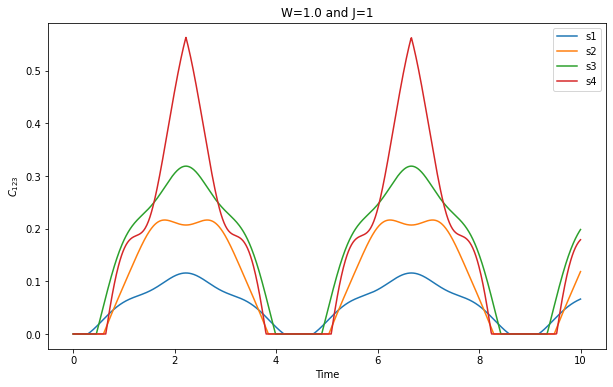

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), con_13_s1 , label="s1")
ax.plot(list(tlist), con_13_s2 , label="s2")
ax.plot(list(tlist), con_13_s3 , label="s3")
ax.plot(list(tlist), con_13_s4 , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'$C_{123}$')
ax.set_title(f"W={w[0]} and J={J[0]}")

In [18]:
con_23_s1 = []
for i in range(len(result1.states)):
  values =  np.sqrt(result1.states[i].ptrace([1,2]).eigenenergies())
  con_23_s1.append(concurrence(values))

con_23_s2 = []
for i in range(len(result2.states)):
  values =  np.sqrt(result2.states[i].ptrace([1,2]).eigenenergies())
  con_23_s2.append(concurrence(values))

con_23_s3 = []
for i in range(len(result3.states)):
  values =  np.sqrt(result3.states[i].ptrace([1,2]).eigenenergies())
  con_23_s3.append(concurrence(values))

con_23_s4 = []
for i in range(len(result4.states)):
  values =  np.sqrt(result4.states[i].ptrace([1,2]).eigenenergies())
  con_23_s4.append(concurrence(values))

Text(0.5, 1.0, 'W=1.0 and J=1')

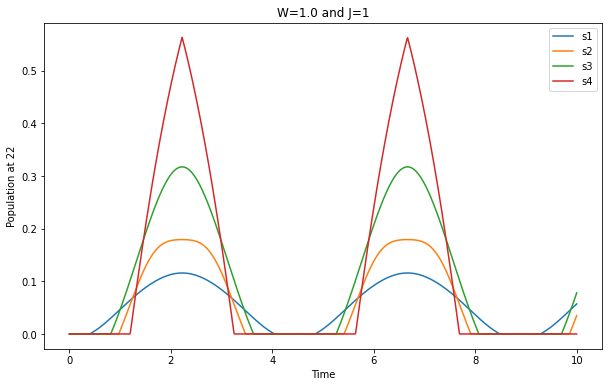

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), con_23_s1 , label="s1")
ax.plot(list(tlist), con_23_s2 , label="s2")
ax.plot(list(tlist), con_23_s3 , label="s3")
ax.plot(list(tlist), con_23_s4 , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

## Concurrence in three qubits

In [20]:
cc1 = []
for i in range(len(result1.states)):
  sub_traz = result1.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc1.append(tra_power)

cc2 = []
for i in range(len(result2.states)):
  sub_traz = result2.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc2.append(tra_power)

cc3 = []
for i in range(len(result3.states)):
  sub_traz = result3.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc3.append(tra_power)

cc4 = []
for i in range(len(result4.states)):
  sub_traz = result4.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc4.append(tra_power)

Text(0.5, 1.0, 'W=1.0 and J=1')

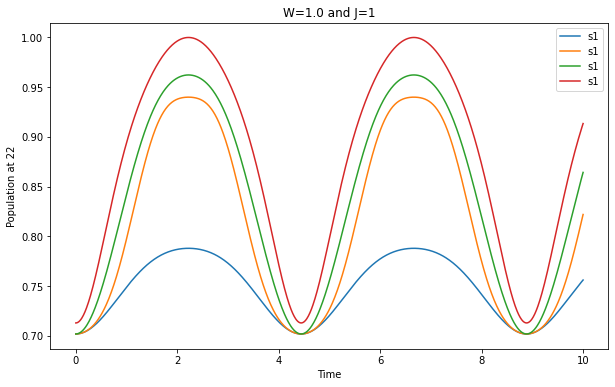

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), cc1 , label="s1")
ax.plot(list(tlist), cc2 , label="s1")
ax.plot(list(tlist), cc3 , label="s1")
ax.plot(list(tlist), cc4 , label="s1")


ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

In [22]:
cc1 = []
for i in range(len(result1.states)):
  sub_traz = result1.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc1.append(tra_power)

cc2 = []
for i in range(len(result2.states)):
  sub_traz = result2.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc2.append(tra_power)

cc3 = []
for i in range(len(result3.states)):
  sub_traz = result3.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc3.append(tra_power)

cc4 = []
for i in range(len(result4.states)):
  sub_traz = result4.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc4.append(tra_power)

Text(0.5, 1.0, 'W=1.0 and J=1')

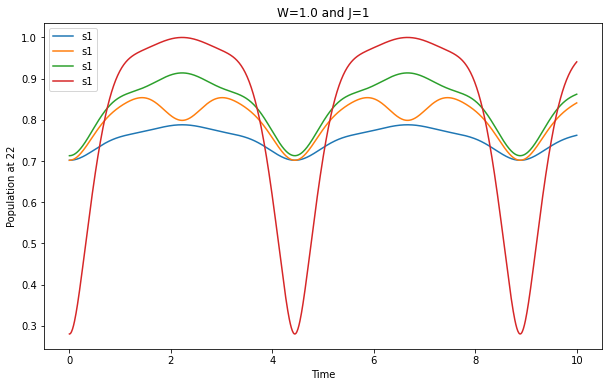

In [23]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), cc1 , label="s1")
ax.plot(list(tlist), cc2 , label="s1")
ax.plot(list(tlist), cc3 , label="s1")
ax.plot(list(tlist), cc4 , label="s1")


ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

## Intrinsic entanglement

In [24]:
c123_s1 = []
for i in range(len(con_23_s1)):
  c123_s1.append( (cc1[i]**2 )  - (con_13_s1[i] ** 2) - (con_23_s1[i] ** 2)) 

c123_s2 = []
for i in range(len(con_23_s1)):
  c123_s2.append( (cc1[i]**2 )  - (con_13_s2[i] ** 2) - (con_23_s2[i] ** 2)) 

c123_s3 = []
for i in range(len(con_23_s1)):
  c123_s3.append( (cc1[i]**2 )  - (con_13_s3[i] ** 2) - (con_23_s3[i] ** 2)) 

c123_s4 = []
for i in range(len(con_23_s1)):
  c123_s4.append( (cc1[i]**2 )  - (con_13_s4[i] ** 2) - (con_23_s4[i] ** 2)) 

Text(0.5, 1.0, 'W=1.0 and J=1')

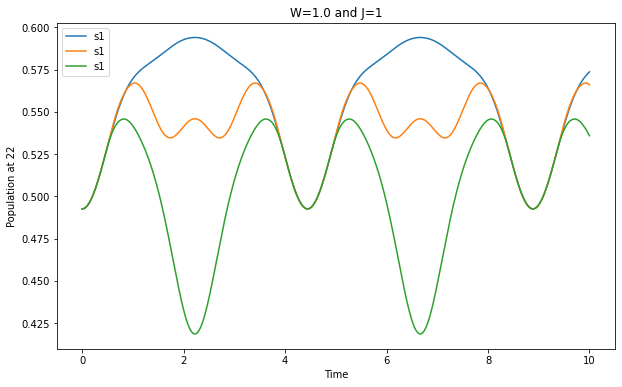

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), c123_s1 , label="s1")
ax.plot(list(tlist), c123_s2 , label="s1")
ax.plot(list(tlist), c123_s3 , label="s1")
#ax.plot(list(tlist), c123_s4 , label="s1")


ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

# Chain coupled to reservoir

In [88]:
# dephasing rate
gamma = 0.1 * np.ones(N)

# collapse operators
c_ops = [np.sqrt(gamma[i]) * sz_list[i] for i in range(N)]


## Simulation

In [89]:
### Run simulation and get results

# Solution s1
result1 = mesolve(L, s1, tlist, c_ops,[])

# Solution s2
result2 = mesolve(L, s2, tlist, c_ops,[])

# Soluiton s3
result3 = mesolve(L, s3, tlist, c_ops,[])

# Soluiton s4
result4 = mesolve(L, s4, tlist, c_ops,[])

In [90]:
num_rows = len(result1.states)

population_s1 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s1[i] = result1.states[i].diag()

population_s2 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s2[i] = result2.states[i].diag()

population_s3 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s3[i] = result3.states[i].diag()

population_s4 = np.empty( (num_rows, 8) )

for i in range(num_rows):
  population_s4[i] = result4.states[i].diag()

Text(0.5, 1.0, 'W=1.0 and J=1')

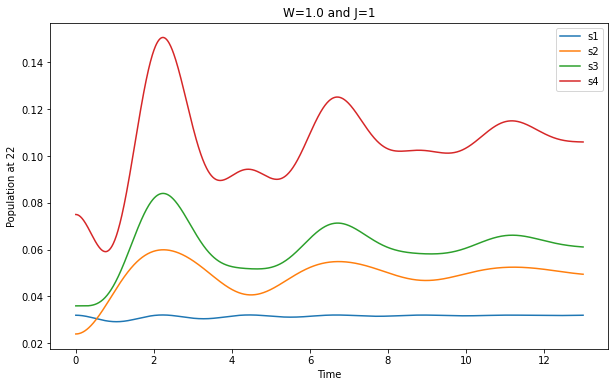

In [91]:
# Population at 22
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,1] , label="s1")
ax.plot(list(tlist), population_s2[:,1] , label="s2")
ax.plot(list(tlist), population_s3[:,1] , label="s3")
ax.plot(list(tlist), population_s4[:,1] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

Text(0.5, 1.0, 'W=1.0 and J=1')

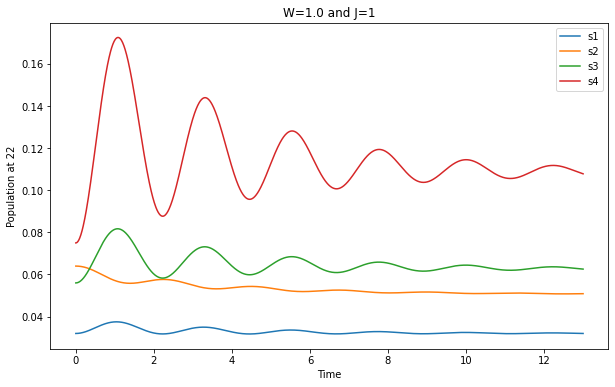

In [92]:
# Population at 33
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,2] , label="s1")
ax.plot(list(tlist), population_s2[:,2] , label="s2")
ax.plot(list(tlist), population_s3[:,2] , label="s3")
ax.plot(list(tlist), population_s4[:,2] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

Text(0.5, 1.0, 'W=1.0 and J=1')

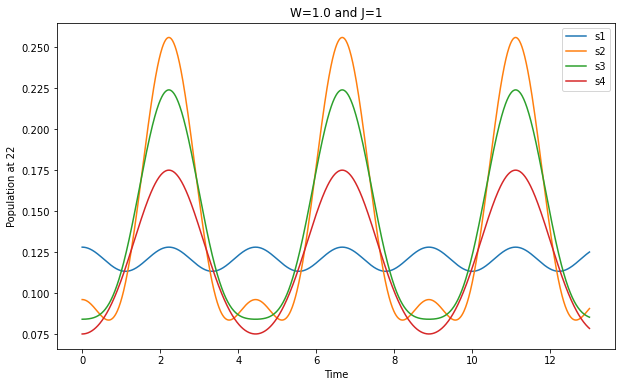

In [ ]:
# Population at 44
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,3] , label="s1")
ax.plot(list(tlist), population_s2[:,3] , label="s2")
ax.plot(list(tlist), population_s3[:,3] , label="s3")
ax.plot(list(tlist), population_s4[:,3] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

Text(0.5, 1.0, 'W=1.0 and J=1')

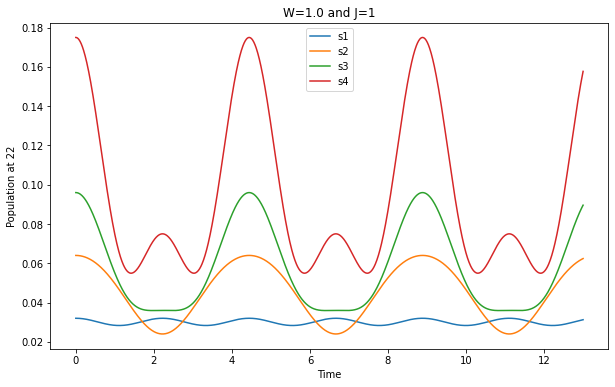

In [ ]:
# Population at 44
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,4] , label="s1")
ax.plot(list(tlist), population_s2[:,4] , label="s2")
ax.plot(list(tlist), population_s3[:,4] , label="s3")
ax.plot(list(tlist), population_s4[:,4] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

Text(0.5, 1.0, 'W=1.0 and J=1')

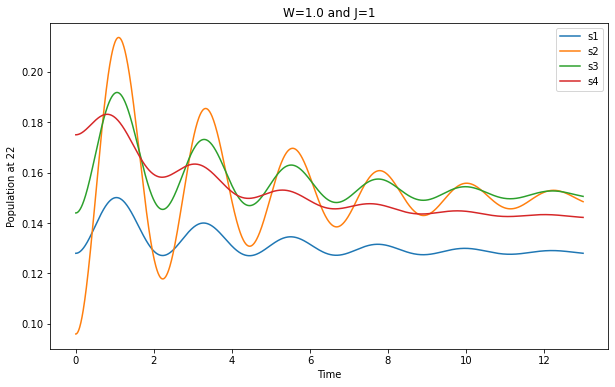

In [93]:
# Population at 44
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), population_s1[:,5] , label="s1")
ax.plot(list(tlist), population_s2[:,5] , label="s2")
ax.plot(list(tlist), population_s3[:,5] , label="s3")
ax.plot(list(tlist), population_s4[:,5] , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

## von Neumann entropy

In [ ]:
from scipy.linalg import logm, expm

In [ ]:
def neuman_entropy(result):

  num_rows = len(result.states)
  neuman_entropy = np.empty(num_rows)

  for i in range(num_rows):
    rho = result.states[i].full()

    rho_log = np.matmul(rho, np.log2(rho))
    neuman_entropy[i] = -np.trace(rho_log)

  return neuman_entropy

In [94]:
entropy_s1 = neuman_entropy(result1)
entropy_s2 = neuman_entropy(result2)
entropy_s3 = neuman_entropy(result3)
entropy_s4 = neuman_entropy(result4)

<ipython-input-77-6b012c695e0a>:10: ComplexWarning: Casting complex values to real discards the imaginary part
  neuman_entropy[i] = -np.trace(rho_log)


Text(0.5, 1.0, 'Entropy')

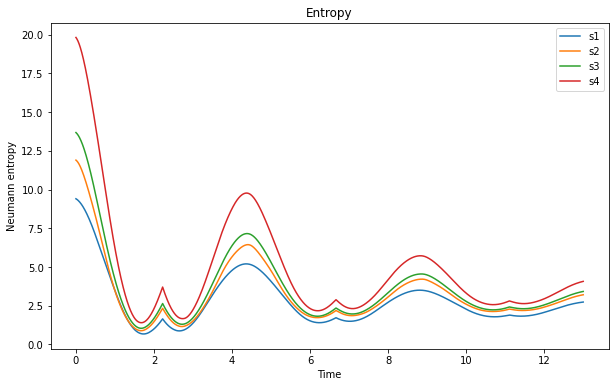

In [95]:
# Von Neuman entorpy as funtion of time
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), entropy_s1 , label="s1")
ax.plot(list(tlist), entropy_s2 , label="s2")
ax.plot(list(tlist), entropy_s3 , label="s3")
ax.plot(list(tlist), entropy_s4 , label="s4")

ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Purity of states')
ax.set_title(f"Entropy")

## Concurrence in three qubits

In [96]:
cc1 = []
for i in range(len(result1.states)):
  sub_traz = result1.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc1.append(tra_power)

cc2 = []
for i in range(len(result2.states)):
  sub_traz = result2.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc2.append(tra_power)

cc3 = []
for i in range(len(result3.states)):
  sub_traz = result3.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc3.append(tra_power)

cc4 = []
for i in range(len(result4.states)):
  sub_traz = result4.states[i].ptrace([0])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc4.append(tra_power)

Text(0.5, 1.0, 'W=1.0 and J=1')

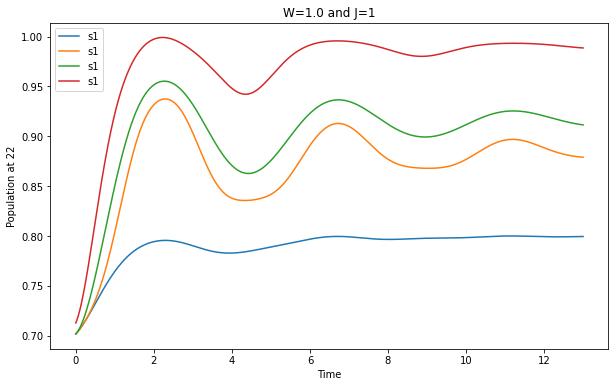

In [97]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), cc1 , label="s1")
ax.plot(list(tlist), cc2 , label="s1")
ax.plot(list(tlist), cc3 , label="s1")
ax.plot(list(tlist), cc4 , label="s1")


ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")

In [ ]:
cc1 = []
for i in range(len(result1.states)):
  sub_traz = result1.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc1.append(tra_power)

cc2 = []
for i in range(len(result2.states)):
  sub_traz = result2.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc2.append(tra_power)

cc3 = []
for i in range(len(result3.states)):
  sub_traz = result3.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc3.append(tra_power)

cc4 = []
for i in range(len(result4.states)):
  sub_traz = result4.states[i].ptrace([1])
  tra_power = np.sqrt(2 *  (1 - (sub_traz  ** 2).tr()))
  cc4.append(tra_power)

Text(0.5, 1.0, 'W=1.0 and J=1')

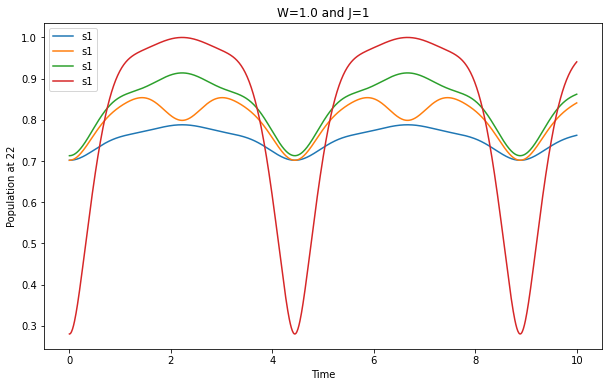

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(list(tlist), cc1 , label="s1")
ax.plot(list(tlist), cc2 , label="s1")
ax.plot(list(tlist), cc3 , label="s1")
ax.plot(list(tlist), cc4 , label="s1")


ax.legend(loc=0)
ax.set_xlabel(r'Time')
ax.set_ylabel(r'Population at 22')
ax.set_title(f"W={w[0]} and J={J[0]}")